This function creates as many time series as requested (via the batch_size argument), each of length n_steps, and there is just one value per time step in each series (i.e., all series are univariate). The function returns a NumPy array of shape [batch size, time steps, 1], where each series is the sum of two sine waves of fixed amplitudes but random frequencies and phases, plus a bit of noise.

In [14]:
import numpy as np
import matplotlib.pyplot as plt


def generate_time_series(batch_size, n_steps):
    freq1, freq2, offset1, offset2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offset1) * (freq1 * 10 + 10))     # wave 1
    series += 0.2 * np.sin((time - offset2) * (freq2 * 20 + 20))    # wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)      # noise
    return series[..., np.newaxis].astype(np.float32)

def plot_time_series(batch_size, series): 
    plt.figure(figsize=(10, 6))
    for i in range(batch_size):
        plt.plot(series[i, :, 0], label=f'Série {i+1}')

    plt.xlabel("Passo de tempo")
    plt.ylabel("Valor da série")
    plt.title("Visualização das Séries Temporais Geradas")
    plt.legend(loc="upper right", fontsize=8)
    plt.show()          

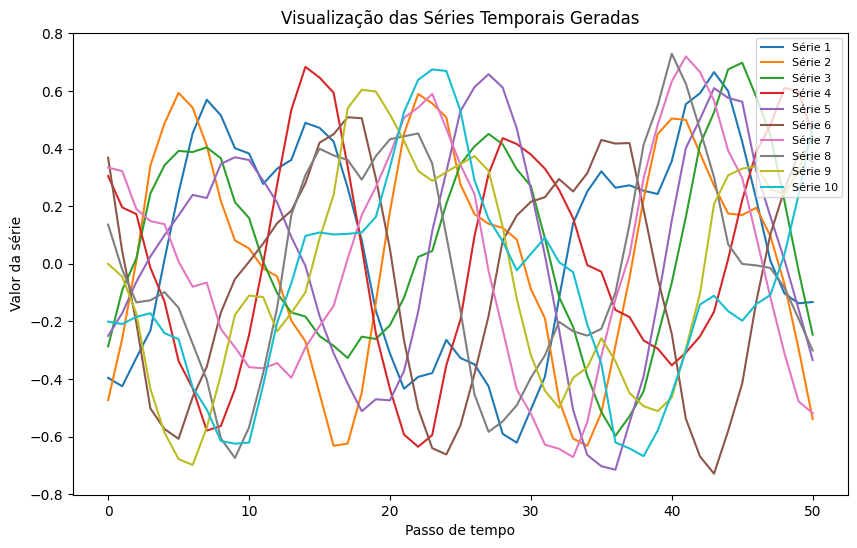

In [16]:
n_steps = 50
batch_size = 10000
series = generate_time_series(batch_size, n_steps + 1)
plot_time_series(10, series)

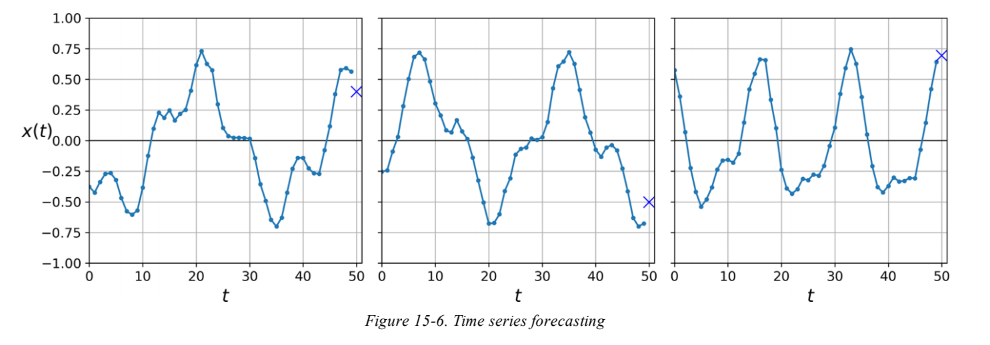

In [17]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [18]:
import keras

y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

2025-02-02 02:08:49.177083: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-02 02:08:49.423149: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-02 02:08:49.547325: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738462129.861493    7736 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738462129.944691    7736 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-02 02:08:50.598021: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

np.float32(0.01999251)

In [23]:
def compile_model(model):
    # Compiling the model
    model.compile(loss="mse", optimizer="adam")

    # Training the model
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

    # Evaluating the model
    mse = model.evaluate(X_valid, y_valid)
    print(f"Validation MSE: {mse:.4f}")

In [29]:
model_RNA = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[50, 1]),
        keras.layers.Dense(1)
])
model_RNN = keras.models.Sequential([
        keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

complex_RNN = keras.models.Sequential([
        keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
        keras.layers.SimpleRNN(20, return_sequences=True),
        keras.layers.SimpleRNN(1)
])

complex_dense_RNN  = keras.models.Sequential([
        keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
        keras.layers.SimpleRNN(20),
        keras.layers.Dense(1)
])

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


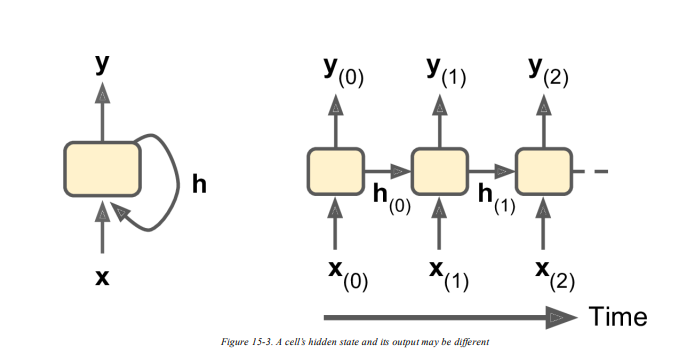

by default, the SimpleRNN layer uses the hyperbolic tangent activation function. It works exactly as we
saw earlier: the initial state h is set to 0, and it is passed to a single recurrent neuron, along with the value of the first time step, x . The neuron computes a weighted sum of these values and applies the hyperbolic tangent activation function to the result, and this gives the first output, y . In a simple RNN, this output is also the new state h . This new state is passed to the same recurrent neuron along with the next input value, x , and the process is repeated until the last time step. Then the layer just outputs the last value, y . All of this is performed simultaneously for every time series.


In [26]:
compile_model(model_RNN)

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1361 - val_loss: 0.1382
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1396 - val_loss: 0.1379
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1377 - val_loss: 0.1377
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1384 - val_loss: 0.1373
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1397 - val_loss: 0.1428
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1375 - val_loss: 0.1430
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1406 - val_loss: 0.1513
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1376 - val_loss: 0.1376
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1393 - val_loss: 0.1394
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1382 - val_loss: 0.1384
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1381 - val_loss: 0.1381
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

In [25]:
compile_model(model_RNA)

Epoch 1/20


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

In [28]:
compile_model(complex_RNN)

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0500 - val_loss: 0.0043
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0041 - val_loss: 0.0030
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 

In [30]:
compile_model(complex_dense_RNN)

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0745 - val_loss: 0.0062
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0053 - val_loss: 0.0040
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0038 - val_loss: 0.0033
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0030 - val_loss: 0.0034
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 